# PROYECTO DE INTELIGENCIA ARTIFICIAL: Seleccion de características

Las siguientes funciones se encargan de obtener los atributos con los que trabajaremos, ademas de obtener los atributos ordenados y los objetivos para ambos csv.

Importaciones:

In [109]:
import pandas as pd

import numpy as np

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [83]:
def lectura_titanic():
    fichero = pd.read_csv('Desktop/ia/Inteligencia-artificial/titanic.csv')    
    return fichero

def lectura_breastCancer():
    fichero = pd.read_csv('Desktop/ia/Inteligencia-artificial/BreastCancer.csv')
    return fichero

In [84]:
titanic = lectura_titanic()
breast_cancer = lectura_breastCancer()

In [85]:
# Eleccion de semilla inicial aleatoria.
np.random.seed(357823)

# Atributos discretos, continuos y objetivo de titanic.csv.
atributos_discretos_titanic = ['Sex', 'Embarked', 'Alone', 'Deck']
atributos_continuos_titanic = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Initial', 
                           'Age_band', 'Family_Size', 'Fare_cat', 'Title', 'Is_Married']
atributos_titanic = titanic.loc[:, atributos_discretos_titanic + atributos_continuos_titanic]
objetivo_titanic = titanic['Survived']

# Atributos discretos, continuos y objetivo de BreastCancer.csv.
atributos_continuos_breast_cancer = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 
                           'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 
                           'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error',
                           'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 
                           'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points',
                           'worst symmetry', 'worst fractal dimension']
																				
atributos_breast_cancer = breast_cancer.loc[:, atributos_continuos_breast_cancer]
objetivo_breast_cancer = breast_cancer['diagnosis']

##### A continuación realizaremos los algoritmos de busqueda con los que vamos a trabajar. Para ello, trabajaremos con el algoritmo de "Decision tree clasifier" y el algoritmo de "Naives bayes".

#### Trabajo con titanic.csv

In [86]:
# DECISION TREE CLASIFIER
codificador_atributos_discretos_titanic = OrdinalEncoder()
codificador_atributos_discretos_titanic.fit(atributos_titanic[atributos_discretos_titanic])

OrdinalEncoder()

Comprobamos que realmente sean los atributos seleccionados discretos.

In [87]:
print('Número de atributos detectados:',
      f'{codificador_atributos_discretos_titanic.n_features_in_}')
print()
print('Nombres de los atributos detectados:')
print(f'{codificador_atributos_discretos_titanic.feature_names_in_}')
print()
print('Categorías detectadas de cada atributo:')
for atributo, categorías in zip(
    codificador_atributos_discretos_titanic.feature_names_in_,
    codificador_atributos_discretos_titanic.categories_):
    print(f'{atributo}: {categorías}')

Número de atributos detectados: 4

Nombres de los atributos detectados:
['Sex' 'Embarked' 'Alone' 'Deck']

Categorías detectadas de cada atributo:
Sex: ['female' 'male']
Embarked: ['C' 'Q' 'S']
Alone: ['No' 'Yes']
Deck: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'U']


Segidamente, transformamos los atributos discretos en datos continuos.

In [88]:
atributos_titanic[atributos_discretos_titanic] = codificador_atributos_discretos_titanic.transform(
    atributos_titanic[atributos_discretos_titanic]
)
atributos_titanic.head()

,Sex,Embarked,Alone,Deck,Pclass,Age,SibSp,Parch,Fare,Initial,Age_band,Family_Size,Fare_cat,Title,Is_Married
0,1.0,2.0,0.0,8.0,3,22.0,1,0,7.2500,0,1,1,0,11,0
1,0.0,0.0,0.0,2.0,1,38.0,1,0,71.2833,1,2,1,3,12,1
2,0.0,2.0,1.0,8.0,3,26.0,0,0,7.9250,2,1,0,1,8,0
3,0.0,2.0,0.0,2.0,1,35.0,1,0,53.1000,1,2,1,3,12,1
4,1.0,2.0,1.0,8.0,3,35.0,0,0,8.0500,0,2,0,1,11,0


El código crea un codificador de etiquetas (LabelEncoder), ajusta el codificador a los datos objetivo y los transforma en valores numéricos, proporcionando una representación codificada de las clases presentes en los datos.

In [89]:
codificador_objetivo_titanic = LabelEncoder()
objetivo_titanic = codificador_objetivo_titanic.fit_transform(objetivo_titanic)
print(f'Clases detectadas: {codificador_objetivo_titanic.classes_}')
objetivo_titanic

Clases detectadas: [0 1]


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [159]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en
# cada nodo la mejor combinación atributo-umbral para particionar el conjunto
# de ejemplos asociado al nodo, no considera los atributos en orden, sino que
# los reordena aleatoriamente. Esto puede hacer que se obtenga un árbol
# distinto cada vez que se ejecuta el código, ya que produce como efecto que
# los empates en esa búsqueda se deshacen de forma aleatoria. Por tanto, para
# que el código sea reproducible debemos establecer una semilla aleatoria inicial.

# Por otra parte, para evitar el sobreajuste del árbol a los ejemplos de
# entrenamiento vamos a limitar la profundidad del árbol construido.

clasificador_CART_titanic = DecisionTreeClassifier(
    max_depth=10
)
clasificador_CART_titanic.fit(atributos_titanic, objetivo_titanic)

DecisionTreeClassifier(max_depth=10)

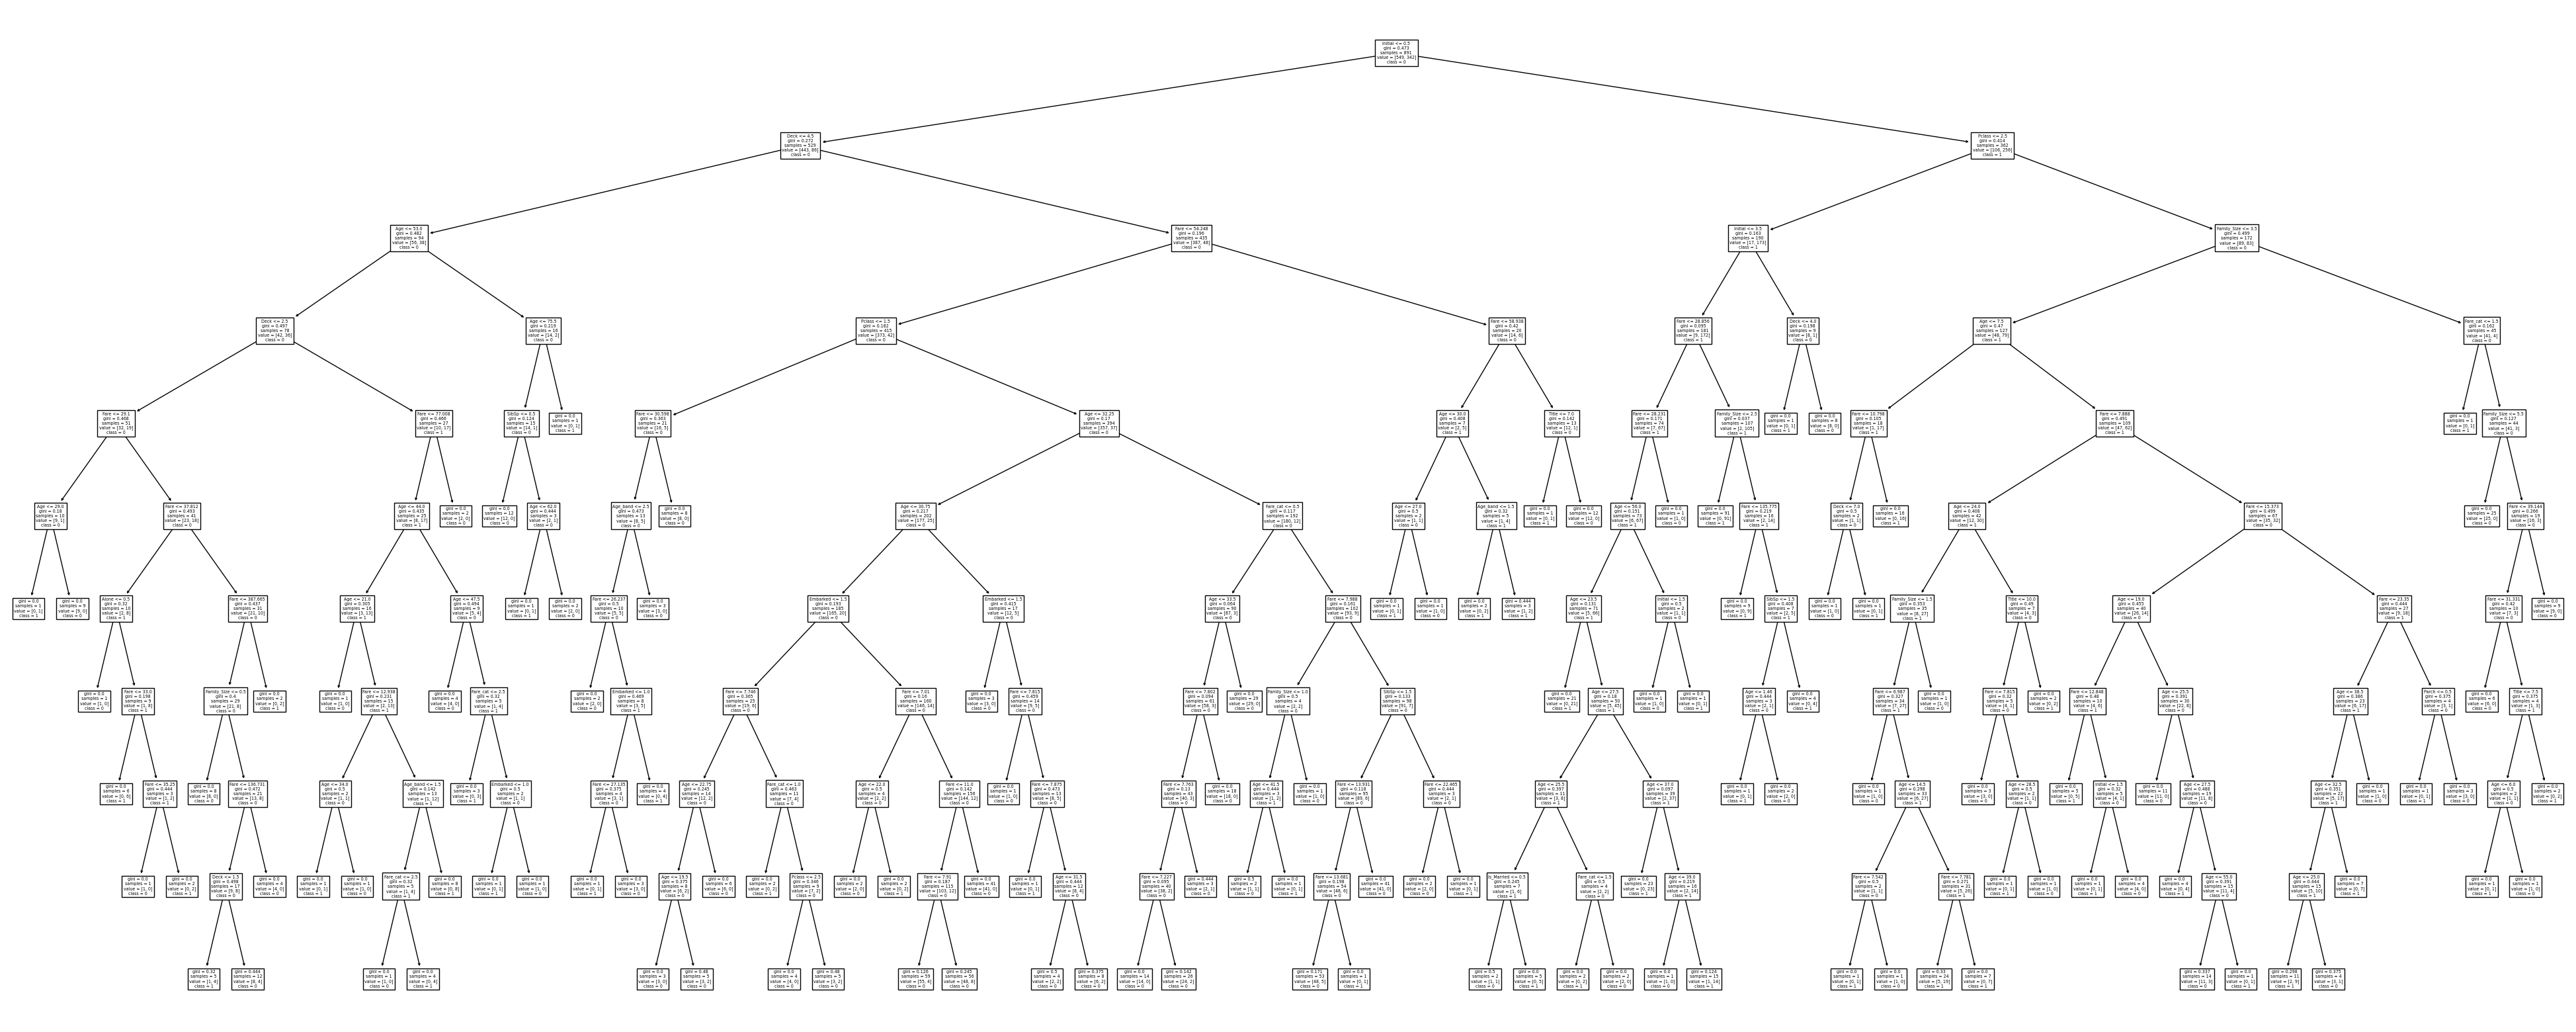

In [160]:
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol_titanic = plot_tree(clasificador_CART_titanic,
                  # El argumento feature_names permite proporcionar, en una
                  # lista, los nombres de los atributos.
                  feature_names=atributos_discretos_titanic + atributos_continuos_titanic,
                  # El argumento class_names permite proporcionar, en una
                  # lista, los nombres de las clases
                  class_names=["0", "1"])

In [161]:
predicciones_titanic = clasificador_CART_titanic.predict(atributos_titanic)
predicciones_titanic

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [162]:
clasificador_CART_titanic.score(atributos_titanic, objetivo_titanic)

0.9461279461279462

In [163]:
pd.Series(objetivo_titanic).value_counts()

0    549
1    342
Name: count, dtype: int64

In [164]:
pd.Series(predicciones_titanic).value_counts()

0    577
1    314
Name: count, dtype: int64

In [165]:
confusion_matrix(objetivo_titanic, predicciones_titanic)

array([[539,  10],
       [ 38, 304]], dtype=int64)

In [166]:
recall_score(objetivo_titanic, predicciones_titanic)

0.8888888888888888